# Dependencies and SetUp

In [1]:
# Dependencies and SetUp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import os
from scipy.stats import linregress

In [2]:
# Open csv files
s_file = "Resources/ca_energy_gen.csv"
s_emis_file = "Resources/ca_emissions.csv"

#CA power generation 
ca_df = pd.read_csv(s_file)
ca_df

#CA emissions
ca_em_df = pd.read_csv(s_emis_file)
ca_em_df

,Year,Transportation,Electric Power,Industrial,Commercial & Residential,Agriculture,High GWP,Recycling & Waste
0,2011,161.8,89.2,89.4,46.0,34.4,14.5,8.4
1,2012,161.4,98.2,88.9,43.5,35.5,15.5,8.3
2,2013,161.3,91.4,91.7,44.2,33.8,16.8,8.4
3,2014,162.6,88.9,92.5,38.2,34.7,17.7,8.4
4,2015,166.2,84.8,90.3,38.8,33.5,18.6,8.5
5,2016,169.8,68.6,89.0,40.6,33.3,19.2,8.6
6,2017,171.2,62.1,88.8,41.3,32.5,20.0,8.7
7,2018,169.6,63.1,89.2,41.4,32.7,20.4,8.7
8,2019,166.1,58.8,88.2,43.8,31.8,20.6,8.9


In [3]:
#Add total column to emissions
ca_em_df['Total'] = ca_em_df['Transportation'] + ca_em_df['Electric Power'] + ca_em_df['Industrial'] + ca_em_df['Commercial & Residential'] + ca_em_df['Agriculture'] + ca_em_df['High GWP'] + ca_em_df['Recycling & Waste']
ca_em_df

,Year,Transportation,Electric Power,Industrial,Commercial & Residential,Agriculture,High GWP,Recycling & Waste,Total
0,2011,161.8,89.2,89.4,46.0,34.4,14.5,8.4,443.7
1,2012,161.4,98.2,88.9,43.5,35.5,15.5,8.3,451.3
2,2013,161.3,91.4,91.7,44.2,33.8,16.8,8.4,447.6
3,2014,162.6,88.9,92.5,38.2,34.7,17.7,8.4,443.0
4,2015,166.2,84.8,90.3,38.8,33.5,18.6,8.5,440.7
5,2016,169.8,68.6,89.0,40.6,33.3,19.2,8.6,429.1
6,2017,171.2,62.1,88.8,41.3,32.5,20.0,8.7,424.6
7,2018,169.6,63.1,89.2,41.4,32.7,20.4,8.7,425.1
8,2019,166.1,58.8,88.2,43.8,31.8,20.6,8.9,418.2


In [4]:
#Calculate all totals for power generation
ca_df["CA Renew Total"] = ca_df["CA Large Hydro"] + ca_df["CA Small Hydro"] + ca_df["CA Geothermal"] + ca_df["CA Biomass"] + ca_df["CA Wind"] + ca_df["CA Solar PV"] + ca_df["CA Solar Thermal"] + ca_df["CA Waste Heat"]
ca_df["CA Non Renew Total"] = ca_df["CA Nuclear"] + ca_df["CA Coal"] + ca_df["CA Oil"] + ca_df["CA Natural Gas"] + ca_df["CA Petroleum Coke"]
ca_df["CA Total"] = ca_df["CA Renew Total"] + ca_df["CA Non Renew Total"]
ca_df

,Year,CA Large Hydro,CA Small Hydro,CA Nuclear,CA Coal,CA Oil,CA Natural Gas,CA Geothermal,CA Biomass,CA Wind,CA Solar PV,CA Solar Thermal,CA Petroleum Coke,CA Waste Heat,CA Renew Total,CA Non Renew Total,CA Total
0,2011,35682,7055,36666,2096,36,91063,12685,6060,7598,226,889,1024,267,70462,130885,201347
1,2012,22737,4724,18491,1262,48,121777,12733,6211,9242,1018,867,318,217,57749,141896,199645
2,2013,20319,3782,17860,824,38,120863,12510,6559,11964,3772,686,194,222,59814,139779,199593
3,2014,13739,2742,17027,802,45,121855,12186,6785,13104,9148,1624,208,237,59565,139937,199502
4,2015,11569,2427,18525,309,54,117565,11994,6367,12191,13057,2446,229,177,60228,136682,196910
5,2016,24410,4576,18931,324,37,98879,11582,5905,13499,17385,2548,207,182,80087,118378,198465
6,2017,36920,6384,17925,302,33,89588,11745,5847,12867,21895,2464,246,163,98285,108094,206379
7,2018,22096,4248,18268,294,35,90691,11528,5909,14244,24721,2545,207,223,85514,109495,195009
8,2019,33145,5349,16163,250,36,86134,10967,5936,13688,26323,2302,191,220,97930,102774,200704
9,2020,17938,3476,16280,317,30,92298,11345,5680,13708,27179,2277,197,187,81790,109122,190912


In [5]:
#Build percentage df
ca_perc_df = ca_df.loc[:, ["Year", "CA Renew Total", "CA Non Renew Total", "CA Total"]]
ca_perc_df["CA Renew Perc"] = round((ca_df["CA Renew Total"] / ca_df["CA Total"]) * 100, 2)
ca_perc_df["CA Non Renew Perc"] = round((ca_df["CA Non Renew Total"] / ca_df["CA Total"]) * 100, 2)

ca_perc_df

,Year,CA Renew Total,CA Non Renew Total,CA Total,CA Renew Perc,CA Non Renew Perc
0,2011,70462,130885,201347,35.00,65.00
1,2012,57749,141896,199645,28.93,71.07
2,2013,59814,139779,199593,29.97,70.03
3,2014,59565,139937,199502,29.86,70.14
4,2015,60228,136682,196910,30.59,69.41
5,2016,80087,118378,198465,40.35,59.65
6,2017,98285,108094,206379,47.62,52.38
7,2018,85514,109495,195009,43.85,56.15
8,2019,97930,102774,200704,48.79,51.21
9,2020,81790,109122,190912,42.84,57.16


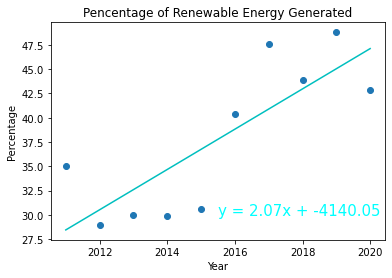

In [6]:
#scatter plot
#calculate linear regression and line
(s_slope, s_intercept, s_rvalue, _, _) = stats.linregress(ca_df["Year"], ca_perc_df["CA Renew Perc"])
s_regress_values = ca_df["Year"] * s_slope + s_intercept
s_line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_intercept,2))
plt.plot(ca_df["Year"],s_regress_values,"c-")

s_year = ca_df["Year"]
s_renew = ca_perc_df["CA Renew Perc"]
s_non_renew = ca_perc_df["CA Non Renew Perc"]
plt.scatter(s_year,s_renew)
plt.xlabel("Year")
plt.title("Pencentage of Renewable Energy Generated")
plt.ylabel("Percentage")
plt.annotate(s_line_eq,(2015.5,30),fontsize=15,color="cyan")

plt.savefig("Images/ca_renew.png")
plt.show()

In [7]:
#Predictive Model
p_year = int(input('Enter a year: '))
print(f"The percentage of Renewable Energy in {p_year} will be {round(s_slope * p_year + s_intercept,2)}%.")

Enter a year:  2050


The percentage of Renewable Energy in 2050 will be 109.29%.


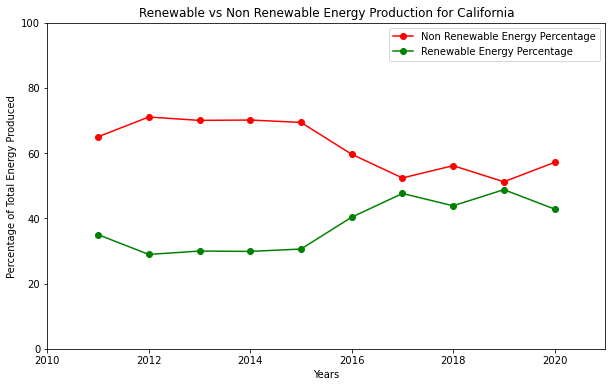

In [8]:
#Percentage of renewable power 
plt.figure(figsize=(10,6))
plt.plot(s_year, s_non_renew, color="red", marker ='o', label="Non Renewable Energy Percentage")
plt.plot(s_year, s_renew, color="green", marker ='o', label="Renewable Energy Percentage")
plt.title("Renewable vs Non Renewable Energy Production for California")
plt.xlabel("Years")
plt.ylabel("Percentage of Total Energy Produced")
plt.ylim(0,100)
plt.xlim(2010,2021)
plt.legend(loc='best')

plt.savefig("Images/ca_renew_vs_non.png")
plt.show()


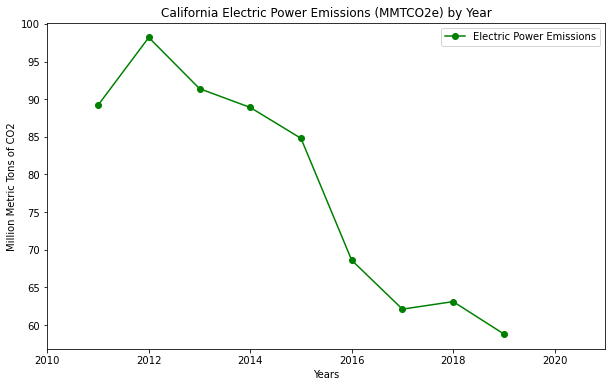

California's Electric Power emissions have declinced 34.08%.


In [9]:
#CA emissions for electric power
s_em_year = ca_em_df["Year"]
s_em_elec = ca_em_df["Electric Power"]
s_em_total = ca_em_df["Total"]

plt.figure(figsize=(10,6))
plt.plot(s_em_year, s_em_elec, color="green", marker ='o', label="Electric Power Emissions")

plt.title("California Electric Power Emissions (MMTCO2e) by Year")
plt.xlabel("Years")
plt.ylabel("Million Metric Tons of CO2")
#plt.ylim(50,100)
plt.xlim(2010,2021)
plt.legend(loc='best')

plt.savefig("Images/ca_elec_emissions.png")
plt.show()
s_em_elec_change = (1 - (ca_em_df["Electric Power"][8] / ca_em_df["Electric Power"][0]))*100
print(f"California's Electric Power emissions have declinced {round(s_em_elec_change, 2)}%.")

In [10]:
#Predictive Model
(s_em_slope, s_em_intercept, s_em_rvalue, _, _) = stats.linregress(ca_em_df["Year"], ca_em_df["Electric Power"])

s_pre_em_year = int(input('Enter a year: '))
print(f"The CO2 emissions in {s_pre_em_year} will be {round(s_em_slope * s_pre_em_year + s_em_intercept,2)}(MMTCO2).")

Enter a year:  2050


The CO2 emissions in 2050 will be -100.04(MMTCO2).


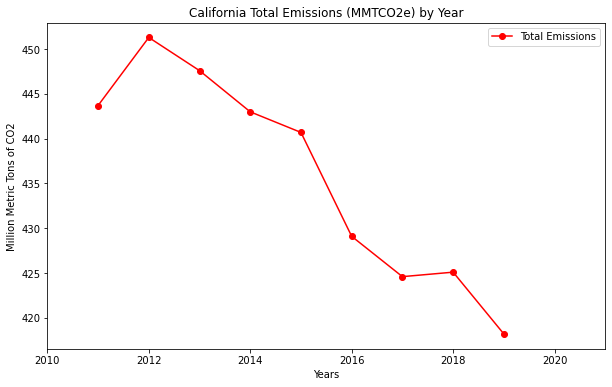

California's total emissions have declinced 5.75%


In [11]:
#CA total emissions
plt.figure(figsize=(10,6))
plt.plot(s_em_year, s_em_total, color="red", marker ='o', label="Total Emissions")
plt.title("California Total Emissions (MMTCO2e) by Year")
plt.xlabel("Years")
plt.ylabel("Million Metric Tons of CO2")
#plt.ylim(50,100)
plt.xlim(2010,2021)
plt.legend(loc='best')

plt.savefig("Images/ca_total_emissions.png")
plt.show()

em_tot_change = (1 - (ca_em_df["Total"][8] / ca_em_df["Total"][0]))*100
print(f"California's total emissions have declinced {round(em_tot_change, 2)}%") 

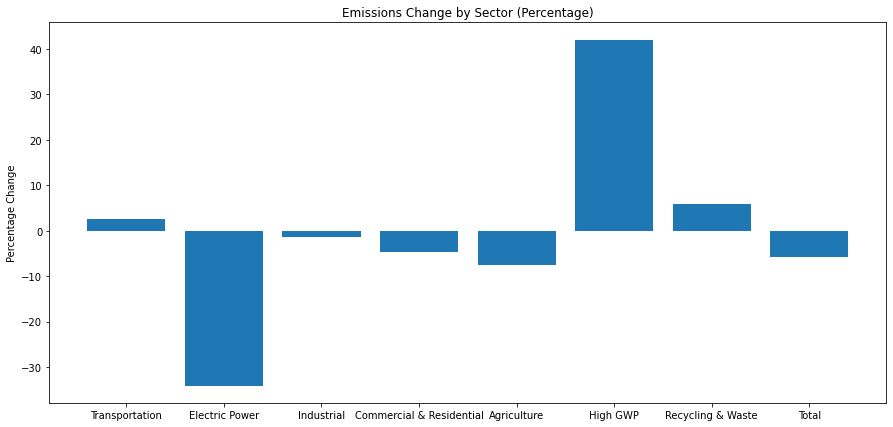

In [12]:
#Create data frame from change in co2 emissions
s_ca_em_per = [(1 - (ca_em_df["Transportation"][8] / ca_em_df["Transportation"][0]))*-100, (1 - (ca_em_df["Electric Power"][8] / ca_em_df["Electric Power"][0]))*-100, (1 - (ca_em_df["Industrial"][8] / ca_em_df["Industrial"][0]))*-100, (1 - (ca_em_df["Commercial & Residential"][8] / ca_em_df["Commercial & Residential"][0]))*-100, (1 - (ca_em_df["Agriculture"][8] / ca_em_df["Agriculture"][0]))*-100, (1 - (ca_em_df["High GWP"][8] / ca_em_df["High GWP"][0]))*-100, (1 - (ca_em_df["Recycling & Waste"][8] / ca_em_df["Recycling & Waste"][0]))*-100, (1 - (ca_em_df["Total"][8] / ca_em_df["Total"][0]))*-100]
s_ca_em_per_lab = ['Transportation', 'Electric Power', 'Industrial', 'Commercial & Residential', 'Agriculture', 'High GWP', 'Recycling & Waste', 'Total']
s_ca_em_per_dic = {s_ca_em_per_lab[i]: s_ca_em_per[i] for i in range(len(s_ca_em_per_lab))}

ca_em_per_df = pd.DataFrame.from_dict(s_ca_em_per_dic, orient='index').T

plt.figure(figsize=(15,7))
plt.bar(s_ca_em_per_lab,s_ca_em_per)
plt.title('Emissions Change by Sector (Percentage)')
plt.ylabel('Percentage Change')
plt.savefig("Images/ca_emissions_decrease.png")

plt.show()

In [13]:
ca_em_per_df

,Transportation,Electric Power,Industrial,Commercial & Residential,Agriculture,High GWP,Recycling & Waste,Total
0,2.657602,-34.080717,-1.342282,-4.782609,-7.55814,42.068966,5.952381,-5.747126


# Total Energy Usage

In [14]:
# Open clean csv file to analyze data and show DataFrame
usage_energy_csv = os.path.join('Resources','Total Energy Consumption 2010 to 2019.csv')
usage_energy_df = pd.read_csv(usage_energy_csv)
usage_energy_df

,Year,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,US
0,2010,640590,1939211,1126614,1428842,7656711,1520724,770893,190374,256515,...,2256820,11613222,753481,2524756,155576,2004183,1810211,751123,540857,97512536
1,2011,640731,1913489,1128390,1470742,7659022,1482132,744433,183642,277371,...,2201541,11833262,790651,2421275,151413,2048341,1797683,737915,557587,96866635
2,2012,630464,1887539,1072394,1439496,7453762,1449604,729271,172778,277310,...,2086273,11864601,786427,2357496,129223,2008228,1737952,730491,550865,94363473
3,2013,597975,1928525,1103707,1458318,7538821,1481200,747660,174798,276458,...,2141266,12635929,822442,2423875,137147,2032101,1833064,750915,539824,97101305
4,2014,594764,1964943,1119467,1468498,7457136,1497768,752569,179278,277183,...,2209079,12635568,794953,2465790,140039,2006565,1889229,780675,536078,98270056
5,2015,611996,1914197,1060614,1490141,7535674,1504228,757383,178219,281784,...,2184369,12766646,798820,2418404,140301,1994002,1814011,768163,506948,97363821
6,2016,592550,1920148,1052290,1520608,7662178,1473860,725276,174551,279071,...,2211934,12994812,808333,2378417,134889,2054215,1800265,761782,504910,97330844
7,2017,600982,1901427,1056516,1527349,7782184,1480979,729157,166877,277278,...,2150054,13180174,828158,2360871,133993,2072728,1817097,752340,534838,97602434
8,2018,603064,1953765,1115392,1537185,7880187,1530859,756938,174538,298329,...,2237640,14017426,845147,2461091,138563,2051060,1895417,830786,557583,101161574
9,2019,615132,1922823,1094729,1550215,7802260,1576477,736036,167662,296506,...,2170424,14227415,854638,2419077,136864,2076024,1846661,827056,540819,100266080


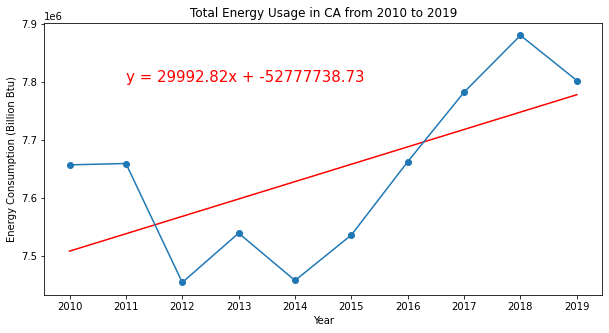

In [15]:
# Graph CA Total Energy Usage from 2010 to 2019
R_x_values = usage_energy_df['Year']
R_y_values = usage_energy_df['CA']
plt.figure(figsize=(10,5))

(r_slope, r_intercept, r_rvalue, _, _) = stats.linregress(R_x_values, R_y_values)
r_regress_values = R_x_values * r_slope + r_intercept
r_line_eq = "y = " + str(round(r_slope,2)) + "x + " + str(round(r_intercept,2))
plt.plot(R_x_values,r_regress_values,"r-")

plt.plot(R_x_values, R_y_values, marker = 'o')
plt.xticks(R_x_values)
plt.title('Total Energy Usage in CA from 2010 to 2019')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Billion Btu)')
plt.annotate(r_line_eq, (2011, 7.8*(10**6)), fontsize = 15, color = 'red')
plt.savefig('Images/Total Energy Usage in CA from 2010 to 2019.png')

plt.show()

In [16]:
# Predicte Model for Total Energy Usage in CA
r_year = int(input('Enter a year: '))
total_consumption_by_year_input = round(r_slope * r_year + r_intercept,2)
print(f"The Total Energy Comsumption in {r_year} will be {total_consumption_by_year_input}.")
percentage_total_usage_consumption_change = round(((abs(usage_energy_df['CA'][9] - total_consumption_by_year_input) / usage_energy_df['CA'][9] )*100),2)
print(f'Which represent an increase of {percentage_total_usage_consumption_change}% since 2019')

Enter a year:  2050


The Total Energy Comsumption in 2050 will be 8707538.55.
Which represent an increase of 11.6% since 2019


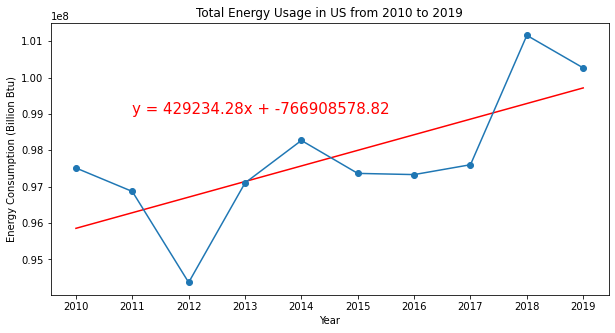

In [17]:
# Get US Total Usage from 2010 to 2019
R_x_values_us = usage_energy_df['Year']
R_y_values_us = usage_energy_df['US']
plt.figure(figsize=(10,5))

(r_slope_us, r_intercept_us, r_rvalue_us, _, _) = stats.linregress(R_x_values_us, R_y_values_us)
r_regress_values_us = R_x_values_us * r_slope_us + r_intercept_us
r_line_eq_us = "y = " + str(round(r_slope_us,2)) + "x + " + str(round(r_intercept_us,2))
plt.plot(R_x_values,r_regress_values_us,"r-")

plt.plot(R_x_values_us, R_y_values_us, marker = 'o')
plt.xticks(R_x_values_us)
plt.xlabel('Year')
plt.title('Total Energy Usage in US from 2010 to 2019')
plt.ylabel('Energy Consumption (Billion Btu)')
plt.annotate(r_line_eq_us, (2011, 0.99*(10**8)), fontsize = 15, color = 'red')
plt.savefig('Images/Total Energy Usage in US from 2010 to 2019.png')

plt.show()

In [18]:
# Predicte Model for Total Energy Usage in US
r_year_us = int(input('Enter a year: '))
total_consumption_by_year_input_us = round(r_slope_us * r_year_us + r_intercept_us,2)
print(f"The Total Energy Comsumption in {r_year_us} will be {total_consumption_by_year_input_us}.")
percentage_total_usage_consumption_change_us = round(((abs(usage_energy_df['US'][9] - total_consumption_by_year_input_us) / usage_energy_df['US'][9] )*100),2)
print(f'Which represent an increase of {percentage_total_usage_consumption_change_us}% since 2019')

Enter a year:  2050


The Total Energy Comsumption in 2050 will be 113021692.7.
Which represent an increase of 12.72% since 2019


In [19]:
# Filter DataFrame to CA, US and Year
R_USA_CA_total_usage = usage_energy_df.loc[:, ['Year', 'CA', 'US']]
R_USA_CA_total_usage

,Year,CA,US
0,2010,7656711,97512536
1,2011,7659022,96866635
2,2012,7453762,94363473
3,2013,7538821,97101305
4,2014,7457136,98270056
5,2015,7535674,97363821
6,2016,7662178,97330844
7,2017,7782184,97602434
8,2018,7880187,101161574
9,2019,7802260,100266080


In [20]:
# Represent how much percentage of Energy does CA represent in the US
R_total_value_ca = []
R_total_value_us = []
R_percentage = []
for R_ca_value in R_USA_CA_total_usage['CA']:
    R_total_value_ca.append(R_ca_value)
for R_us_value in R_USA_CA_total_usage['US']:
    R_total_value_us.append(R_us_value)
for R_i in range(len(R_total_value_us)):
    R_percentages = (R_total_value_ca[R_i]/R_total_value_us[R_i])*100
    R_percentage.append(R_percentages)

In [21]:
R_USA_CA_total_usage['CA Percentage representation'] = R_percentage
R_USA_CA_total_usage

,Year,CA,US,CA Percentage representation
0,2010,7656711,97512536,7.852027
1,2011,7659022,96866635,7.906770
2,2012,7453762,94363473,7.898991
3,2013,7538821,97101305,7.763872
4,2014,7457136,98270056,7.588411
5,2015,7535674,97363821,7.739707
6,2016,7662178,97330844,7.872302
7,2017,7782184,97602434,7.973350
8,2018,7880187,101161574,7.789704
9,2019,7802260,100266080,7.781555


In [22]:
# Filter DataFrame for not US
R_clean_df_no_US = usage_energy_df.drop('US', axis = 1)
R_clean_df_no_US

,Year,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2010,640590,1939211,1126614,1428842,7656711,1520724,770893,190374,256515,...,375369,2256820,11613222,753481,2524756,155576,2004183,1810211,751123,540857
1,2011,640731,1913489,1128390,1470742,7659022,1482132,744433,183642,277371,...,376513,2201541,11833262,790651,2421275,151413,2048341,1797683,737915,557587
2,2012,630464,1887539,1072394,1439496,7453762,1449604,729271,172778,277310,...,373499,2086273,11864601,786427,2357496,129223,2008228,1737952,730491,550865
3,2013,597975,1928525,1103707,1458318,7538821,1481200,747660,174798,276458,...,388780,2141266,12635929,822442,2423875,137147,2032101,1833064,750915,539824
4,2014,594764,1964943,1119467,1468498,7457136,1497768,752569,179278,277183,...,390085,2209079,12635568,794953,2465790,140039,2006565,1889229,780675,536078
5,2015,611996,1914197,1060614,1490141,7535674,1504228,757383,178219,281784,...,386363,2184369,12766646,798820,2418404,140301,1994002,1814011,768163,506948
6,2016,592550,1920148,1052290,1520608,7662178,1473860,725276,174551,279071,...,384537,2211934,12994812,808333,2378417,134889,2054215,1800265,761782,504910
7,2017,600982,1901427,1056516,1527349,7782184,1480979,729157,166877,277278,...,390600,2150054,13180174,828158,2360871,133993,2072728,1817097,752340,534838
8,2018,603064,1953765,1115392,1537185,7880187,1530859,756938,174538,298329,...,403020,2237640,14017426,845147,2461091,138563,2051060,1895417,830786,557583
9,2019,615132,1922823,1094729,1550215,7802260,1576477,736036,167662,296506,...,401702,2170424,14227415,854638,2419077,136864,2076024,1846661,827056,540819


In [23]:
# Filter to year 2019
R_all_states_2019_df = R_clean_df_no_US.loc[R_clean_df_no_US.index[[9]]]
R_all_states_2019_df

,Year,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
9,2019,615132,1922823,1094729,1550215,7802260,1576477,736036,167662,296506,...,401702,2170424,14227415,854638,2419077,136864,2076024,1846661,827056,540819


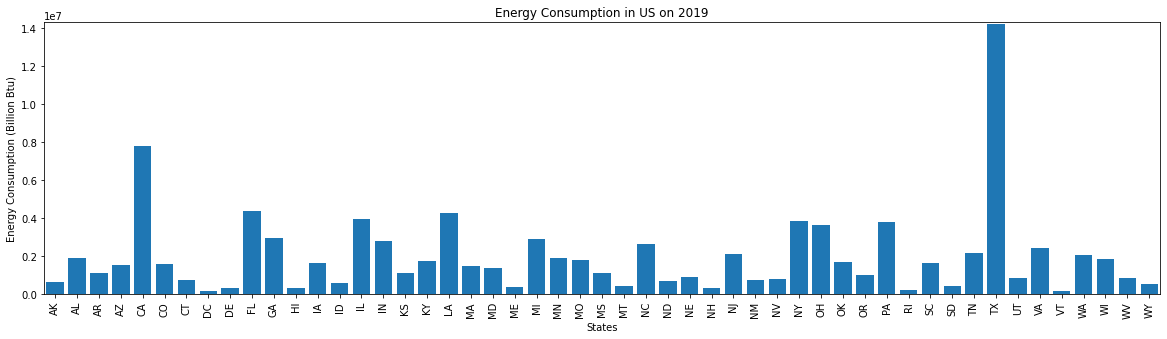

In [24]:
# Plot 2019 Total Energy Usage in US
R_states = R_all_states_2019_df.columns.tolist()[1:]
R_no_year_col = R_all_states_2019_df.drop('Year',axis=1)
R_val = R_no_year_col.iloc[0]
plt.figure(figsize=(20,5))
plt.bar(R_states,R_val)
plt.xticks(rotation=90)
plt.xlim(-0.5,len(R_states)-0.5)
plt.ylim(0,14227415+100000)
plt.title('Energy Consumption in US on 2019')
plt.xlabel('States')
plt.ylabel('Energy Consumption (Billion Btu)')
plt.savefig('Images/Energy Consumption in US on 2019.png')

plt.show()

# ANOVA Testing Data

In [25]:
#ANOVA Testing Data - Dylan
filepath_dylan = 'Resources/Clean US Power Source vs Energy Production.csv'
data_dylan = pd.read_csv(filepath_dylan)
data_dylan.head()

,United States Power Source,Energy Production (Thousand Megawatthours)
0,All Fuels (Utility-Scale),348128.0
1,Coal,171660.0
2,Petroleum Liquids,3073.0
3,Petroleum Coke,1038.0
4,Natural Gas,66847.0


In [26]:
#Find the mean, median, std of Coal, Natural Gas & Nuclear - Dylan
coal_dylan = data_dylan[data_dylan["United States Power Source"] == "Coal"]
naturalgas_dylan = data_dylan[data_dylan["United States Power Source"] == "Natural Gas"]
nuclear_dylan = data_dylan[data_dylan["United States Power Source"] == "Nuclear"]


In [27]:
coal_dylan.describe()

,Energy Production (Thousand Megawatthours)
count,132.000000
mean,112274.833333
std,30597.385274
min,40189.000000
25%,88671.500000
50%,115063.500000
75%,133692.000000
max,177778.000000


In [28]:
naturalgas_dylan.describe()

,Energy Production (Thousand Megawatthours)
count,132.000000
mean,99178.371212
std,24849.109796
min,56492.000000
25%,82918.250000
50%,95855.000000
75%,113068.250000
max,176293.000000


In [29]:
nuclear_dylan.describe()

,Energy Production (Thousand Megawatthours)
count,132.000000
mean,66416.037879
std,4801.755054
min,54547.000000
25%,63124.750000
50%,66029.500000
75%,71299.000000
max,74649.000000


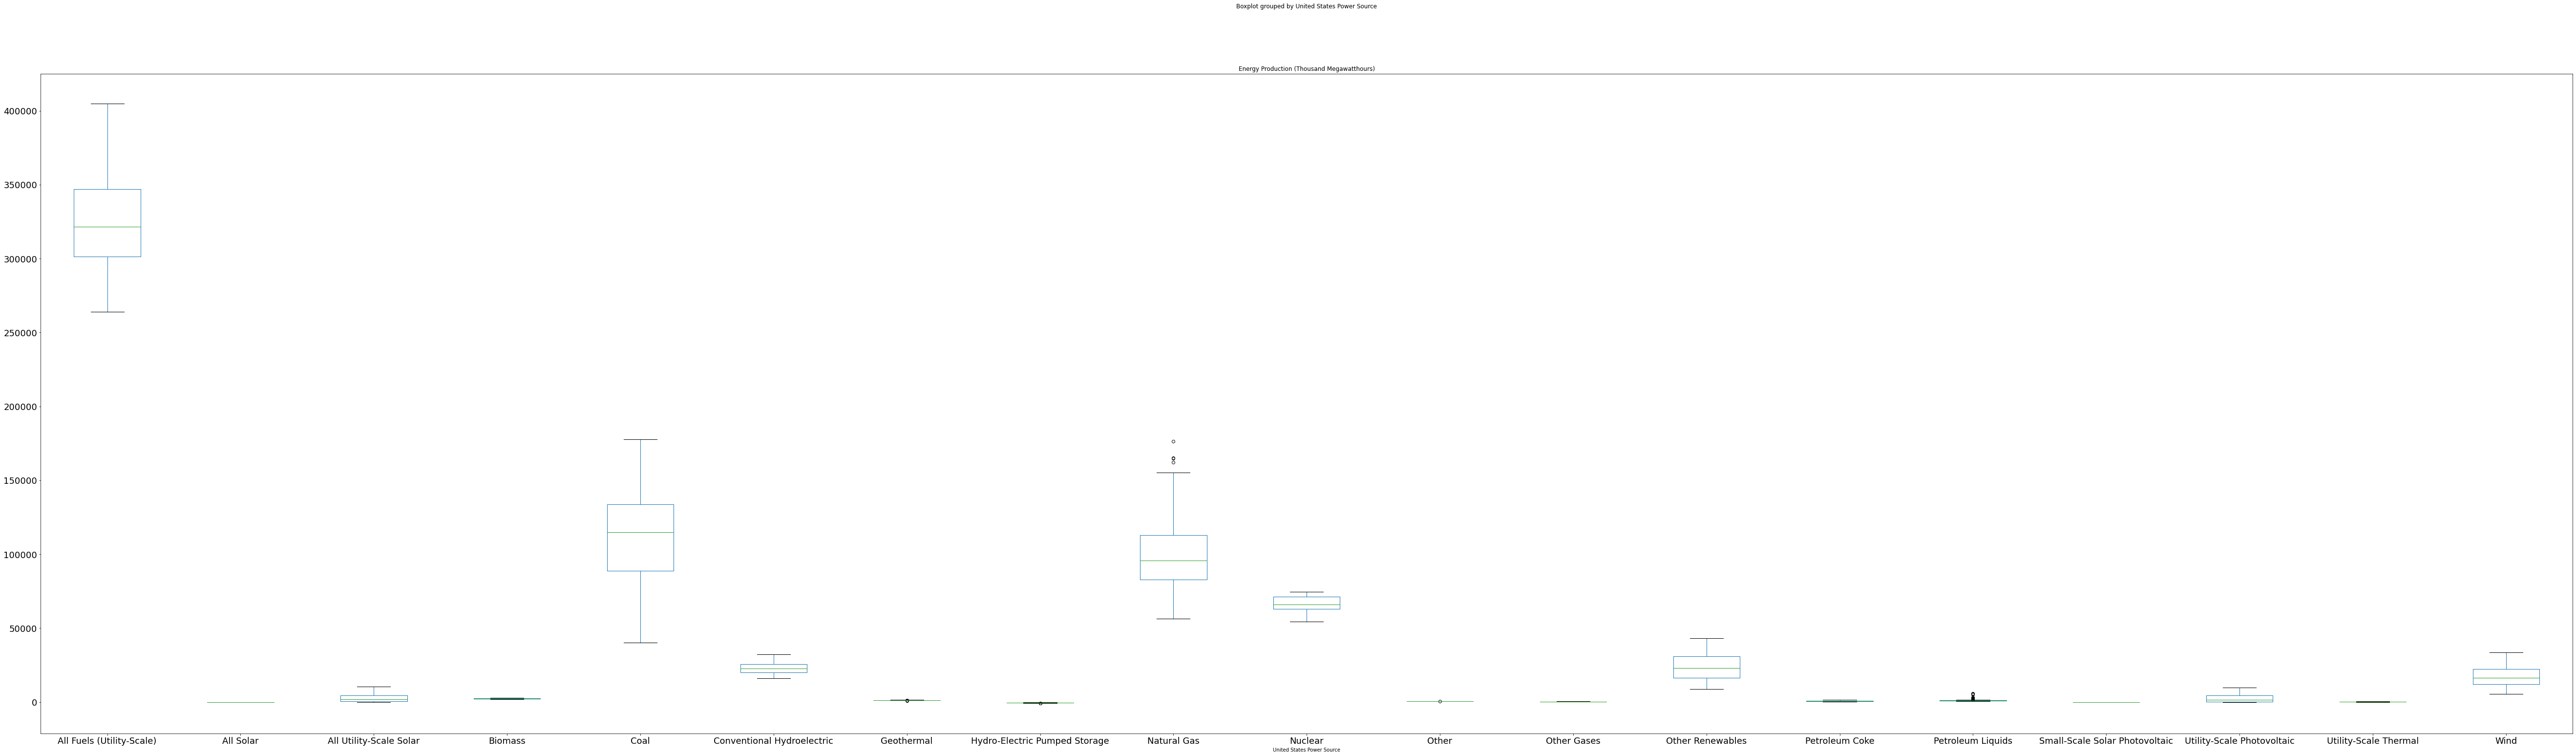

In [30]:
#ANOVA sample variance between means of each power-source - Dylan
data_dylan.boxplot(column='Energy Production (Thousand Megawatthours)', by='United States Power Source', figsize=(90,25), grid=False, fontsize='18')
plt.savefig('Images/Box-Plot U.S. Energy Production Years 2010-2020.png', transparent=False, bbox_inches='tight')

In [31]:
#List of power source names - Dylan
power_source_names_dylan = data_dylan['United States Power Source'].unique().tolist()

In [32]:
#Extract individual groups for U.S. power-sources U.S total groups: 19 - Dylan

def extract(power_source):
    
    pop = data_dylan[data_dylan['United States Power Source']==power_source]['Energy Production (Thousand Megawatthours)']
    pop
    return pop
    
    return group

group1_dylan = extract(power_source_names_dylan[0])
group2_dylan = extract(power_source_names_dylan[1])
group3_dylan = extract(power_source_names_dylan[2])
group4_dylan = extract(power_source_names_dylan[3])
group5_dylan = extract(power_source_names_dylan[4])
group6_dylan = extract(power_source_names_dylan[5])
group7_dylan = extract(power_source_names_dylan[6])
group8_dylan = extract(power_source_names_dylan[7])
group9_dylan = extract(power_source_names_dylan[8])
group10_dylan = extract(power_source_names_dylan[9])
group11_dylan = extract(power_source_names_dylan[10])
group12_dylan = extract(power_source_names_dylan[11])
group13_dylan = extract(power_source_names_dylan[12])
group14_dylan = extract(power_source_names_dylan[13])
group15_dylan = extract(power_source_names_dylan[14])
group16_dylan = extract(power_source_names_dylan[15])
group17_dylan = extract(power_source_names_dylan[16])
group18_dylan = extract(power_source_names_dylan[17])
group19_dylan = extract(power_source_names_dylan[18])


In [33]:
#ANOVA Test - Dylan
stats.f_oneway(group2_dylan, group3_dylan, group4_dylan, group5_dylan, group6_dylan, group7_dylan, group8_dylan, group9_dylan, group10_dylan, group11_dylan, group12_dylan, group13_dylan, group14_dylan, group15_dylan, group16_dylan, group17_dylan, group18_dylan, group19_dylan)

F_onewayResult(statistic=2070.1725078577947, pvalue=0.0)

# Power Plants and Total Energy Produce

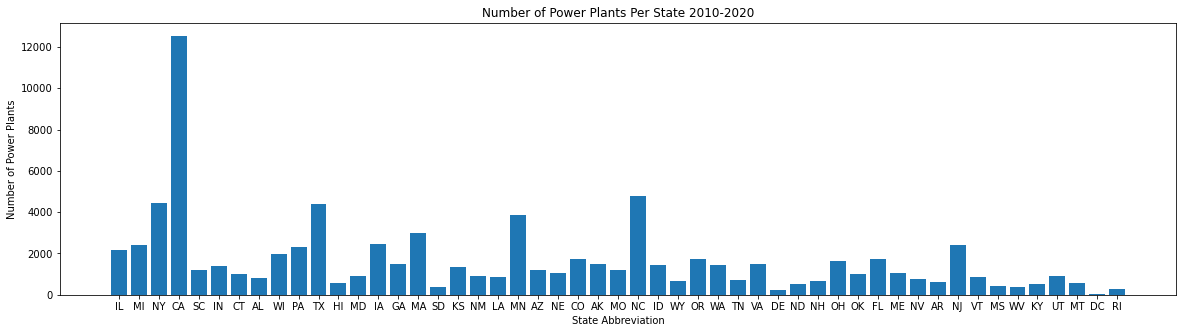

In [34]:
# Boris's Analysis
# read in created Csv's
data_b = pd.read_csv('Resources/MergedYearlyData.csv')
yearly_df = pd.read_csv('Resources/YearlyBreakdown.csv')


yearly_gp = yearly_df.groupby(['State','Year']).count()
yearly_gp = yearly_gp.rename(columns = {'Plant Name':'Number of Plants'})

total_plants_US = yearly_gp['Number of Plants'].sum()
states = yearly_df['State'].unique()

num_plants = []
for st in states:
    num_plants.append(yearly_gp['Number of Plants'].loc[st].sum())

# Construct Plot
plt.figure(figsize=(20,5))
plt.bar(states,num_plants)
plt.title('Number of Power Plants Per State 2010-2020')
plt.xlabel("State Abbreviation")
plt.ylabel('Number of Power Plants')
plt.savefig('Images/Number_of_PowerPlants_per_State.png')
plt.show()

Text(0, 0.5, 'California/Total Plants in US')

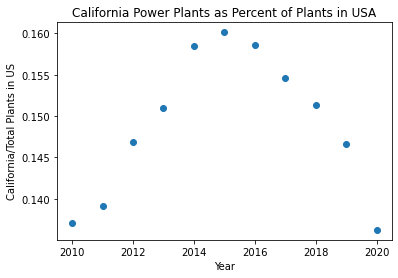

In [35]:
# powerplant construction over time for california
per_year_plants = yearly_df.groupby('Year').count()['Plant Name']
CA_plants = yearly_gp['Number of Plants'].loc['CA'].iloc[0:11]
CA_percents_per_year = CA_plants/per_year_plants
years_b = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

plt.scatter(years_b,CA_percents_per_year)
plt.title('California Power Plants as Percent of Plants in USA')
plt.xlabel('Year')
plt.ylabel('California/Total Plants in US')

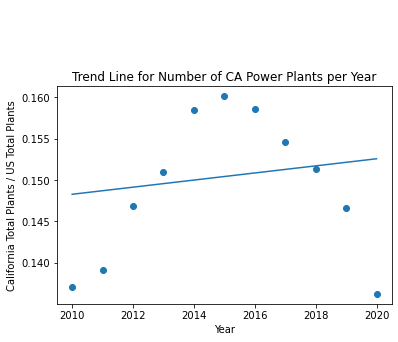

In [36]:
# Linear Regression on percentage of Californian Plants in US per Year
slope_b ,y_intercept_b, _, _, _ = linregress(years_b,CA_percents_per_year)
slope_b = round(slope_b,6)
y_intercept_b = round(y_intercept_b,3)
x_vals = years_b
y_vals = [slope_b*yr + y_intercept_b for yr in x_vals]
line_b = f'y = {slope_b}x + {y_intercept_b}'
plt.scatter(years_b,CA_percents_per_year)
plt.plot(x_vals,y_vals)
plt.annotate(line_b,xy = (2010,.17))
plt.title('Trend Line for Number of CA Power Plants per Year')
plt.xlabel('Year')
plt.ylabel('California Total Plants / US Total Plants')
plt.savefig('Images/CA_Percents.png')

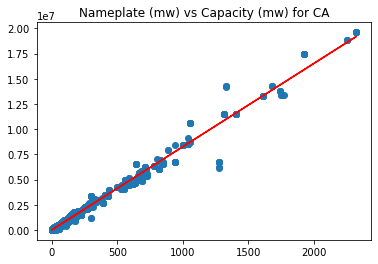

In [37]:
CA_data = data_b[data_b['state'] == 'CA']

# Nameplate mw is essentially how powerful a power plant is over a longer period of time. 
# The capacity is how much energy it can produce. There is a clear correlation between the two here. 
# The more powerful a generator, the more capacity it will have. This trend lies for both CA and USA here.
sc,yc,_,_,_ = linregress(CA_data['nameplate_mw'],CA_data['capacity_mwh'])
susa,yusa,_,_,_ = linregress(data_b['nameplate_mw'],data_b['capacity_mwh'])

plt.plot(CA_data['nameplate_mw'],[sc*x + yc for x in CA_data['nameplate_mw']],color = 'r')
plt.scatter(CA_data['nameplate_mw'],CA_data['capacity_mwh'])
plt.title('Nameplate (mw) vs Capacity (mw) for CA')
plt.savefig('Images/NamePlateCA')
plt.show()

In [38]:
# last bit of data cleaning
data_b = data_b.replace([np.inf, -np.inf], np.nan).dropna()

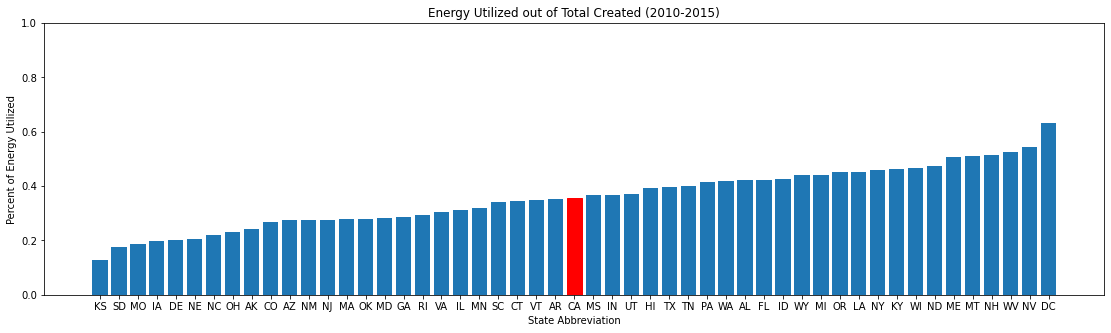

In [39]:
# group by state and calculate average capacity utilization per state
# this measures how much of the power created is actually being used by each state 
#cap_group = data.groupby('state').mean().sort_values(by = 'capacity_utilization')
cap_group = data_b.groupby('state').mean().sort_values(by = ['capacity_utilization'])
c_utils = cap_group['capacity_utilization']
sorted_states = cap_group.index.values.tolist()
CA_index= sorted_states.index('CA')

# construct plot
plt.figure(figsize=(19,5))
p = plt.bar(sorted_states,c_utils)
p[CA_index].set_color('r')
plt.title('Energy Utilized out of Total Created (2010-2015)')
plt.xlabel('State Abbreviation')
plt.ylabel('Percent of Energy Utilized')
plt.ylim(0,1)
plt.savefig('Images/CAvsUSA_Percent_Utilized.png')

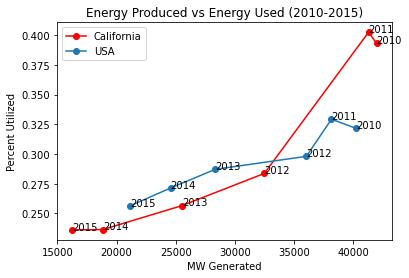

In [40]:
# Create line plot of energy produced versus energy utilized over five year span
# variables for plot
# will use median due to clear outliers in previous plotting attempts
years_b = [2010,2011,2012,2013,2014,2015]
CA = data_b[data_b['state'] == 'CA']
gpCA = CA.groupby('year').median()
gpdata = data_b.groupby('year').median()

plt.plot(gpCA['net_generation_mwh'],gpCA['capacity_utilization'], color = 'r',marker = 'o')
plt.plot(gpdata['net_generation_mwh'],gpdata['capacity_utilization'],marker = 'o')

# this shows us that the more energy is produced, the more it is utilized

# Annotate and set up plot details
plt.title('Energy Produced vs Energy Used (2010-2015)')
plt.xlabel('MW Generated')
plt.ylabel('Percent Utilized')

cords_usa = list(zip(gpdata['net_generation_mwh'],gpdata['capacity_utilization']))
i_b0 = 0
for x in cords_usa:
    plt.annotate(str(years_b[i_b0]),xy = (x[0],x[1]))
    i_b0 = i_b0 + 1

cords_ca = list(zip(gpCA['net_generation_mwh'],gpCA['capacity_utilization']))
j_b  = 0
for x in cords_ca:
    plt.annotate(str(years_b[j_b]),xy = (x[0],x[1]))
    j_b = j_b + 1

plt.legend(['California','USA'])

# Save created Plot
plt.savefig('Images/Energy Generated_vs_Utilized')